# À propos du data set 

Date: heure (année:mois:jour:heure:min:sec) 

Appareils: consommation d'énergie en Wh

Light: Consommation d'énergie des luminaires dans la maison (Wh) 

T1: Température dans la zone de la cuisine (°C) 

RH_1: Humidité dans la zone de la cuisine (%) 

T2: Température dans la zone du salon (°C) 

RH_2: Humidité dans la zone du salon (%) 

T3: Température dans la buanderie 

RH_3: Humidité dans la buanderie (%) 

T4: Température dans la salle de bureau (°C) 

RH_4: Humidité dans la salle de bureau (%) 

T5: Température dans la salle de bain (°C) 

RH_5: Humidité dans la salle de bain (%) 

T6: Température à l'extérieur du bâtiment (côté nord) en (°C) 

RH_6: Humidité à l'extérieur du bâtiment (côté nord) % 

T7: Température dans la salle de repassage en (°C) 

RH_7: Humidité dans la salle de repassage en (%) 

T8: Température dans la chambre d'adolescent 2 en (°C) 

RH_8: Humidité dans la chambre d'adolescent 2 en (%)

T9: Température dans la chambre des parents en (°C) 

RH_9: Humidité dans la chambre des parents en %

T_out:Température extérieure (de la station météorologique de Chievres) en (°C)

Press_mm_hg:Pression (de la station météorologique de Chievres): en mm de Hg

RH_out: Humidité extérieure (de la station météorologique de Chievres) en (%)

windspeed:(de la station météorologique de Chievres): vitesse du vent en (m/s) 

Visibility (de la station météorologique de Chievres): Données ordinales 

Tdewpoint (de la station météorologique de Chievres): Données catégoriques

rv1: Variable aléatoire 1 (sans dimension) 

rav2: Variable aléatoire 2 (sans dimension)

Comme indiqué, les données de la station météorologique de l'aéroport le plus proche (Aéroport de Chievres, Belgique) ont été téléchargées à partir d'un ensemble de données public provenant de "Reliable Prognosis, rp5.ru." La permission a été obtenue de Reliable Prognosis pour la distribution des 4,5 mois de données météorologiques.

# Importation des bibliothèques 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import Lasso

from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor

# Importation des données

In [4]:
data = pd.read_csv("KAG_energydata_complete.csv")
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


# Information et traitement des données 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [9]:
data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [13]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [15]:
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

# Décomposition puis suppression de la colonne "date"

In [26]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['hour'] = data['date'].dt.hour
data['day_of_week'] = data['date'].dt.dayofweek
data['weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
data = data.drop('date', axis=1)

# Détection et remplacement des valeurs aberrantes 

In [29]:
import numpy as np
import pandas as pd

def replace_outliers_with_variance(data):
    data_array = data.to_numpy()  # Convertir le DataFrame en tableau NumPy
    # Calculer la moyenne et la variance de chaque colonne
    means = np.mean(data_array, axis=0)
    variances = np.var(data_array, axis=0)
    
    # Définir un seuil comme étant 3 fois l'écart-type
    threshold = 3 * np.sqrt(variances)
    
    # Remplacer les valeurs aberrantes par la variance de la variable correspondante
    for i in range(data_array.shape[1]):
        column = data_array[:, i]
        outliers_mask = np.abs(column - means[i]) > threshold[i]
        data_array[outliers_mask, i] = variances[i]
    
    return pd.DataFrame(data_array, columns = data.columns, index = data.index)

# Exemple d'utilisation
data_with_replaced_outliers = replace_outliers_with_variance(data)

# Visualisation des données 

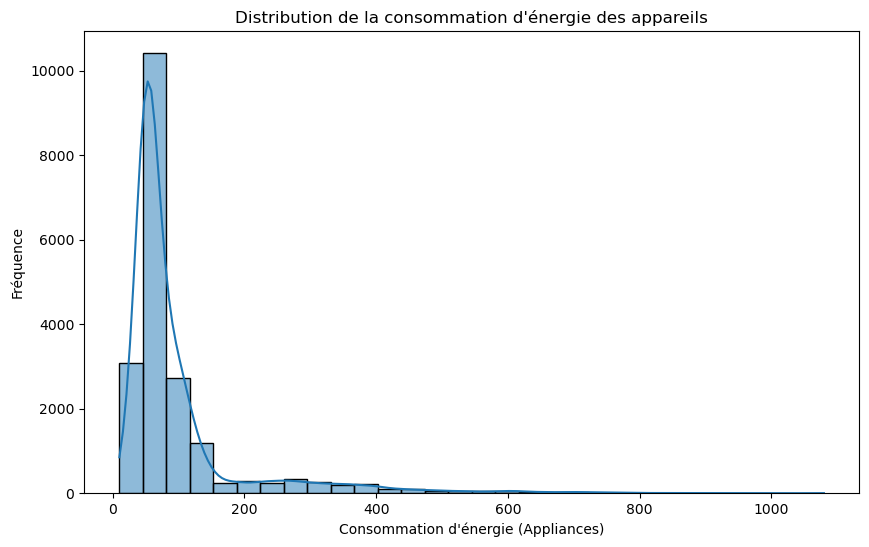

In [32]:
plt.figure(figsize = (10, 6))
sns.histplot(data['Appliances'], bins = 30, kde = True)
plt.title('Distribution de la consommation d\'énergie des appareils')
plt.xlabel('Consommation d\'énergie (Appliances)')
plt.ylabel('Fréquence')
plt.show()

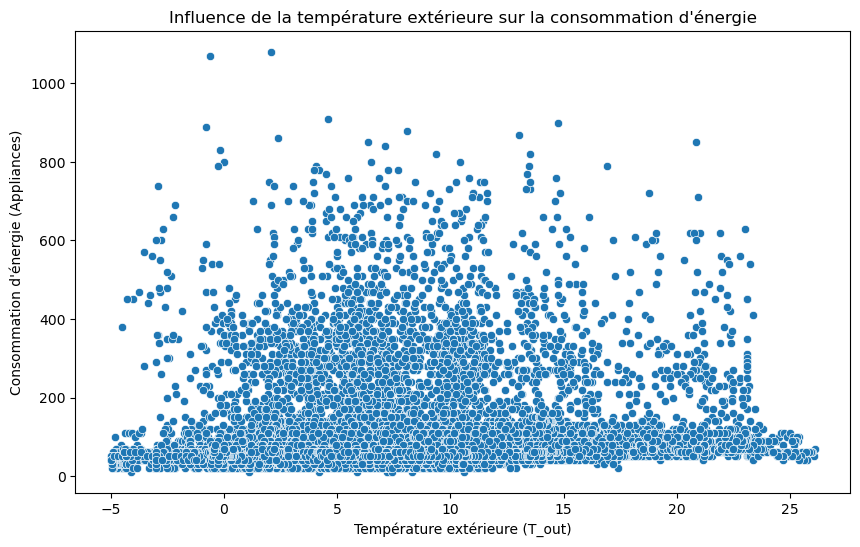

In [34]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'T_out', y = 'Appliances', data = data)
plt.title('Influence de la température extérieure sur la consommation d\'énergie')
plt.xlabel('Température extérieure (T_out)')
plt.ylabel('Consommation d\'énergie (Appliances)')
plt.show()

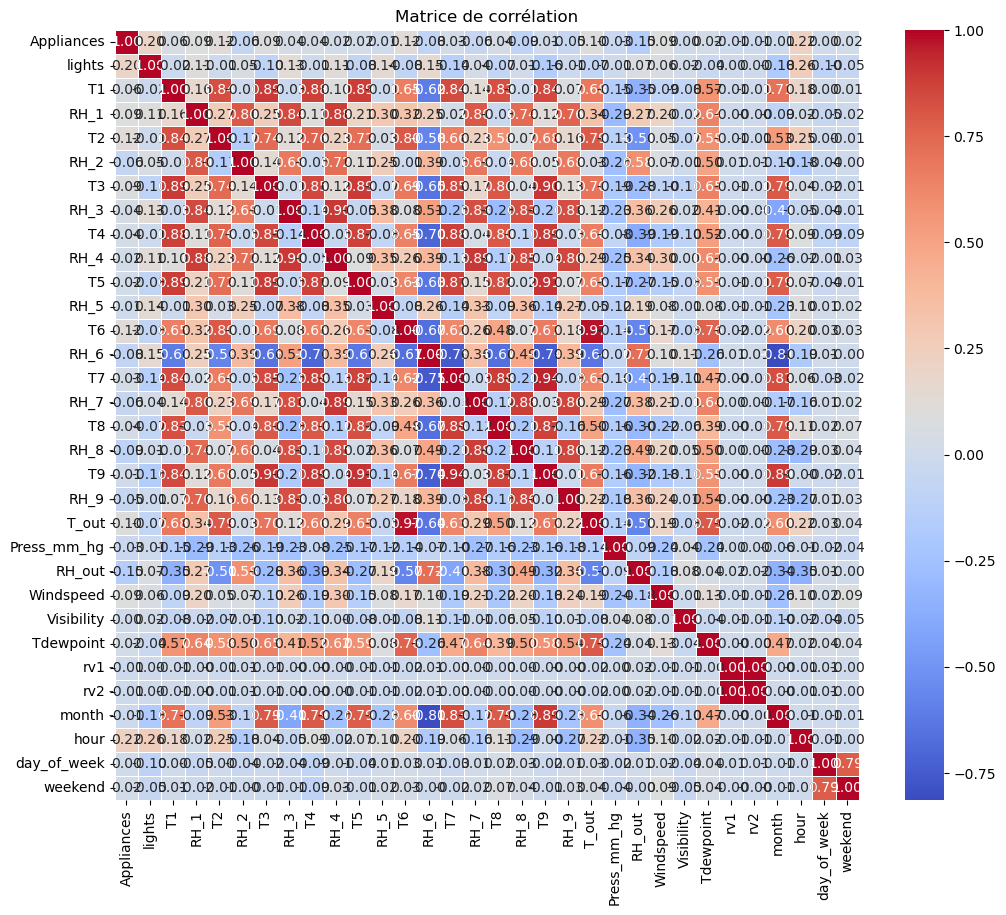

In [36]:
# Calculer la matrice de corrélation
corr_matrix = data.corr()

# Visualiser la matrice de corrélation avec heatmap
plt.figure(figsize = (12, 10))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = 0.5)
plt.title('Matrice de corrélation')
plt.show()

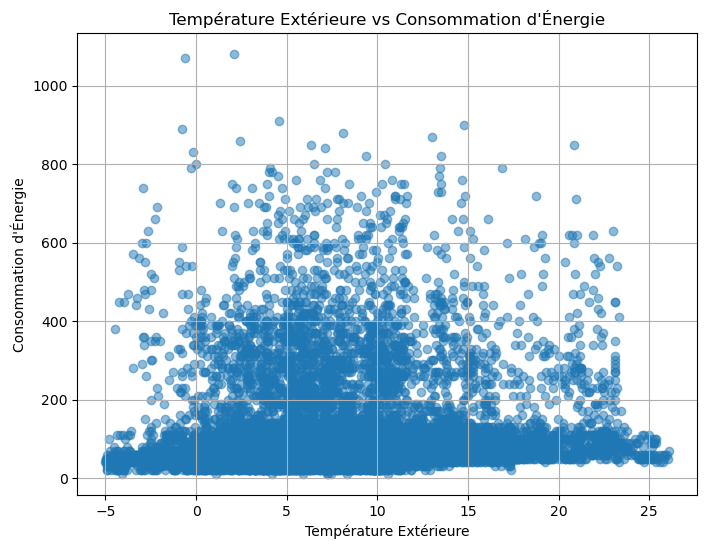

In [38]:
# Tracé d'un diagramme de dispersion

plt.figure(figsize = (8, 6))
plt.scatter(data['T_out'], data['Appliances'], alpha = 0.5)
plt.title('Température Extérieure vs Consommation d\'Énergie')
plt.xlabel('Température Extérieure')
plt.ylabel('Consommation d\'Énergie')
plt.grid(True)
plt.show()

Ce graphique montre la relation entre la température extérieure et la consommation d'énergie. Chaque point représente une observation dans les données, et la dispersion des points peut indiquer la force de la relation entre les deux caractéristiques.

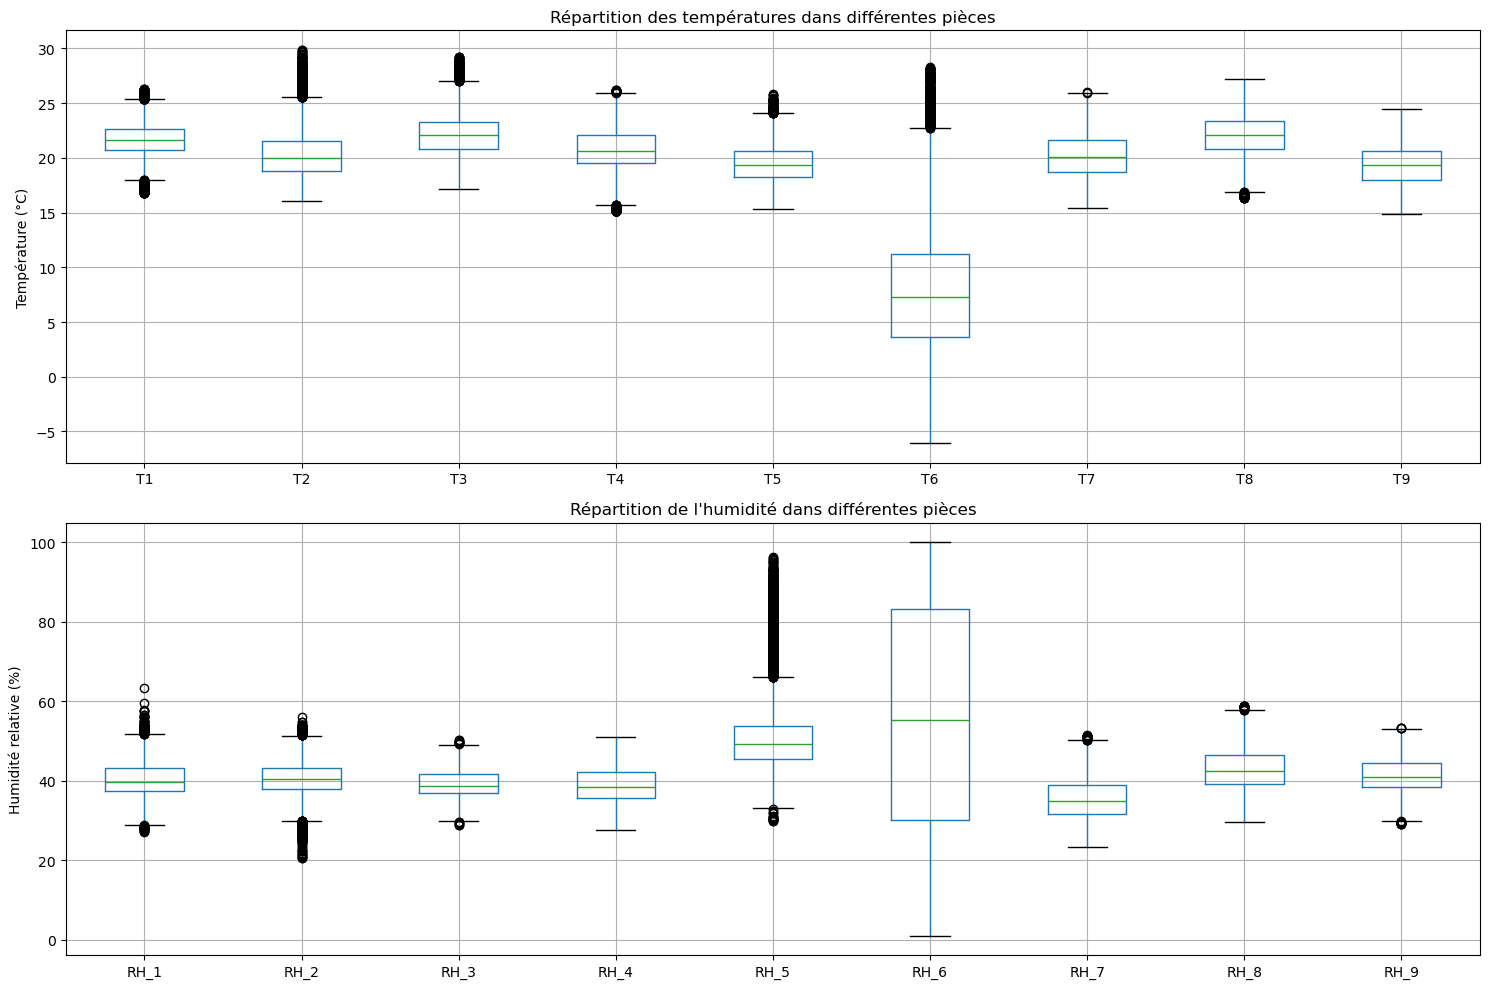

In [40]:
plt.figure(figsize = (15, 10))

# Box plot pour les températures
plt.subplot(2, 1, 1)
temperature_columns = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
data[temperature_columns].boxplot()
plt.title('Répartition des températures dans différentes pièces')
plt.ylabel('Température (°C)')

# Box plot pour l'humidité
plt.subplot(2, 1, 2)
humidity_columns = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']
data[humidity_columns].boxplot()
plt.title('Répartition de l\'humidité dans différentes pièces')
plt.ylabel('Humidité relative (%)')

plt.tight_layout()
plt.show()


# Prédiction de la consommation d'energie des appareils dans les bâtiments 

# Régression Linéaire 

In [42]:
# Séparation des caractéristiques (features) et de la variable cible
X = data.drop(['Appliances'], axis = 1)
y = data['Appliances']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Normalisation des caractéristiques (features) pour mettre à l'échelle
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialisation du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur les données d'entraînement normalisées
model.fit(X_train_scaled, y_train)

# Prédictions sur les ensembles d'entraînement et de test
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Calcul de l'erreur quadratique moyenne (MSE) pour les ensembles d'entraînement et de test
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Calcul du coefficient de détermination (R²) pour les ensembles d'entraînement et de test
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Affichage des résultats
print(f'Train MSE: {mse_train}, Train R^2: {r2_train}')
print(f'Test MSE: {mse_test}, Test R^2: {r2_test}')

Train MSE: 8838.735722626192, Train R^2: 0.16901281478433894
Test MSE: 8294.300393485892, Test R^2: 0.17115770052226453


In [44]:
data.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'month', 'hour', 'day_of_week', 'weekend'],
      dtype='object')

# Régression Lasso

In [46]:
# Initialiser le modèle Lasso
lasso_model = Lasso(alpha = 0.1)  

# Entraîner le modèle sur les données d'entraînement
lasso_model.fit(X_train_scaled, y_train)

# Prédictions sur les données d'entraînement et de test
y_pred_train_lasso = lasso_model.predict(X_train_scaled)
y_pred_test_lasso = lasso_model.predict(X_test_scaled)

# Évaluation des performances
mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)

print("Résultats du modèle Lasso Regression :")
print(f'Train MSE (Lasso): {mse_train_lasso}, Train R^2 (Lasso): {r2_train_lasso}')
print(f'Test MSE (Lasso): {mse_test_lasso}, Test R^2 (Lasso): {r2_test_lasso}')

Résultats du modèle Lasso Regression :
Train MSE (Lasso): 8844.221282012064, Train R^2 (Lasso): 0.16849708157356647
Test MSE (Lasso): 8291.153997572661, Test R^2 (Lasso): 0.17147211715779376


# Régression par Gradient Boosting

In [48]:
# Séparer les caractéristiques et la variable cible
X = data.drop(['Appliances'], axis = 1)  # Caractéristiques
y = data['Appliances']  # Variable cible

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Normaliser les caractéristiques pour mettre à l'échelle
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialiser le modèle de Gradient Boosting Regressor avec les hyperparamètres spécifiés
model = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)

# Entraîner le modèle sur les données d'entraînement normalisées
model.fit(X_train_scaled, y_train)

# Faire des prédictions sur les ensembles d'entraînement et de test
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Calculer l'erreur quadratique moyenne (MSE) pour les ensembles d'entraînement et de test
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Calculer le coefficient de détermination (R²) pour les ensembles d'entraînement et de test
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Afficher les résultats des performances du modèle
print(f'Train MSE: {mse_train}, Train R^2: {r2_train}')
print(f'Test MSE: {mse_test}, Test R^2: {r2_test}')

Train MSE: 6709.684075784479, Train R^2: 0.3691788442605646
Test MSE: 6951.778514159273, Test R^2: 0.3053147564246719


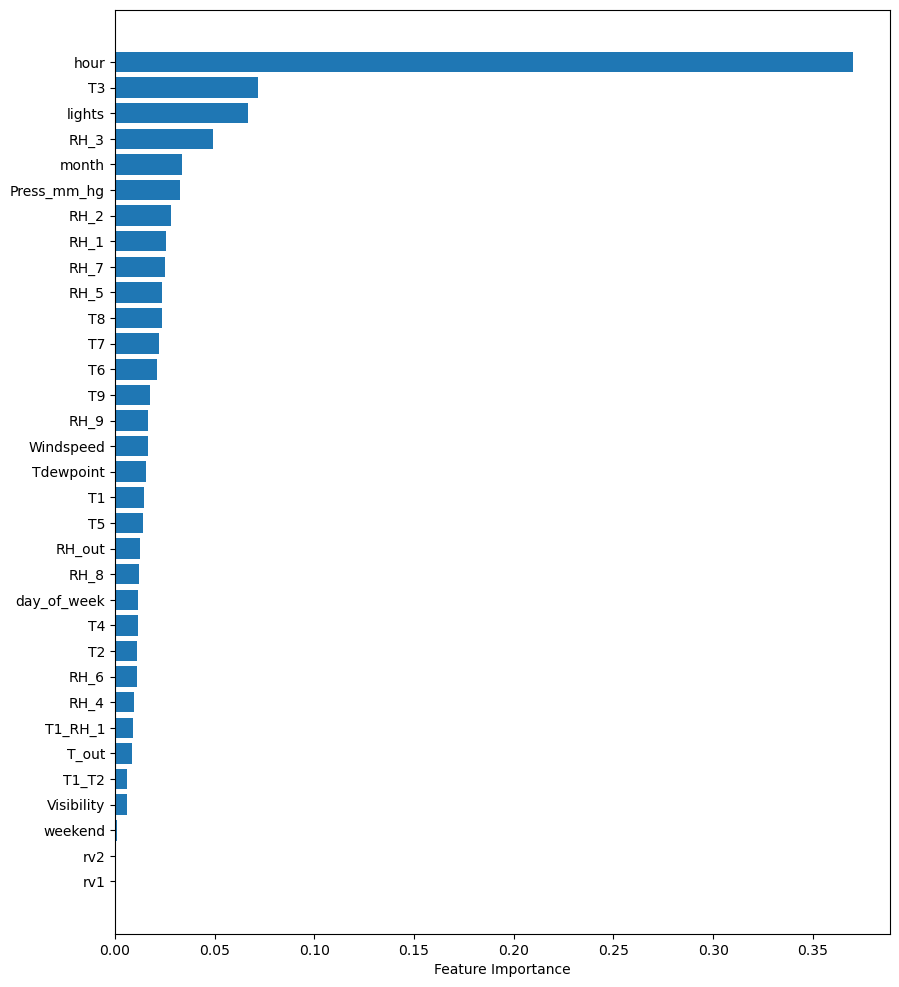

In [50]:
# Interactions entre certaines features
data['T1_T2'] = data['T1'] * data['T2']
data['T1_RH_1'] = data['T1'] * data['RH_1']


# Séparer les caractéristiques et la variable cible
X = data.drop(['Appliances'], axis = 1)
y = data['Appliances']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner un modèle de Gradient Boosting
model = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
model.fit(X_train_scaled, y_train)

# Importance des features
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 12))
plt.barh(range(X_train.shape[1]), feature_importance[sorted_idx])
plt.yticks(range(X_train.shape[1]), X.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()

In [55]:
low_importance_features = [X.columns[i] for i in sorted_idx if feature_importance[i] < 0.01]

X_train_reduced = X_train.drop(low_importance_features, axis = 1)
X_test_reduced = X_test.drop(low_importance_features, axis = 1)

X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)

# Régression des fôrets aléatoires

In [58]:
# Entraîner un modèle de Random Forest
rf_model = RandomForestRegressor(n_estimators = 100, random_state =42)

# Créer un ensemble de modèles
ensemble_model = VotingRegressor([('gb', model), ('rf', rf_model)])
ensemble_model.fit(X_train_scaled, y_train)

# Prédictions et évaluation
y_pred_train_ensemble = ensemble_model.predict(X_train_scaled)
y_pred_test_ensemble = ensemble_model.predict(X_test_scaled)

mse_train_ensemble = mean_squared_error(y_train, y_pred_train_ensemble)
mse_test_ensemble = mean_squared_error(y_test, y_pred_test_ensemble)
r2_train_ensemble = r2_score(y_train, y_pred_train_ensemble)
r2_test_ensemble = r2_score(y_test, y_pred_test_ensemble)

print(f'Train MSE (Ensemble): {mse_train_ensemble}, Train R^2 (Ensemble): {r2_train_ensemble}')
print(f'Test MSE (Ensemble): {mse_test_ensemble}, Test R^2 (Ensemble): {r2_test_ensemble}')


Train MSE (Ensemble): 2691.4604689802995, Train R^2 (Ensemble): 0.7469582495252357
Test MSE (Ensemble): 5027.238894118214, Test R^2 (Ensemble): 0.4976323442182867


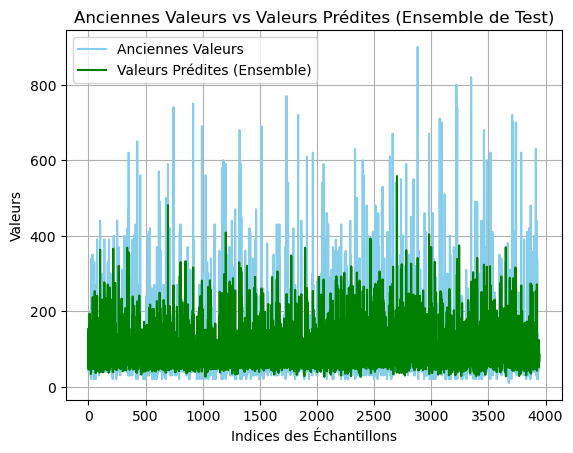

In [60]:
# Tracé des anciennes valeurs en bleu ciel
plt.plot(range(len(y_test)), y_test, color = 'skyblue', label = 'Anciennes Valeurs')

# Tracé des valeurs prédites par l'ensemble de modèles en vert
plt.plot(range(len(y_test)), y_pred_test_ensemble, color = 'green', label = 'Valeurs Prédites (Ensemble)')

plt.title('Anciennes Valeurs vs Valeurs Prédites (Ensemble de Test)')
plt.xlabel('Indices des Échantillons')
plt.ylabel('Valeurs')
plt.legend()

plt.grid(True)
plt.show()

# XGBRegressor

In [62]:
# Initialiser et entraîner le modèle XGBRegressor
xgb_model = XGBRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
xgb_model.fit(X_train_scaled, y_train)

# Prédictions
y_pred_train = xgb_model.predict(X_train_scaled)
y_pred_test = xgb_model.predict(X_test_scaled)

# Évaluation
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'Train MSE: {mse_train}, Train R^2: {r2_train}')
print(f'Test MSE: {mse_test}, Test R^2: {r2_test}')


Train MSE: 6777.007627204618, Train R^2: 0.3628493181553626
Test MSE: 6919.83692145694, Test R^2: 0.3085066522915222


# KNN

In [64]:
# Initialiser et entraîner le modèle KNN
knn_model = KNeighborsRegressor(n_neighbors = 5)
knn_model.fit(X_train_scaled, y_train)

# Prédictions
y_pred_train_knn = knn_model.predict(X_train_scaled)
y_pred_test_knn = knn_model.predict(X_test_scaled)

# Évaluation
mse_train_knn = mean_squared_error(y_train, y_pred_train_knn)
mse_test_knn = mean_squared_error(y_test, y_pred_test_knn)
r2_train_knn = r2_score(y_train, y_pred_train_knn)
r2_test_knn = r2_score(y_test, y_pred_test_knn)

print("Résultats du modèle KNN :")
print(f'Train MSE (KNN): {mse_train_knn}, Train R^2 (KNN): {r2_train_knn}')
print(f'Test MSE (KNN): {mse_test_knn}, Test R^2 (KNN): {r2_test_knn}')


Résultats du modèle KNN :
Train MSE (KNN): 3704.2234608563467, Train R^2 (KNN): 0.6517417961409262
Test MSE (KNN): 5424.389156321256, Test R^2 (KNN): 0.45794546034064476


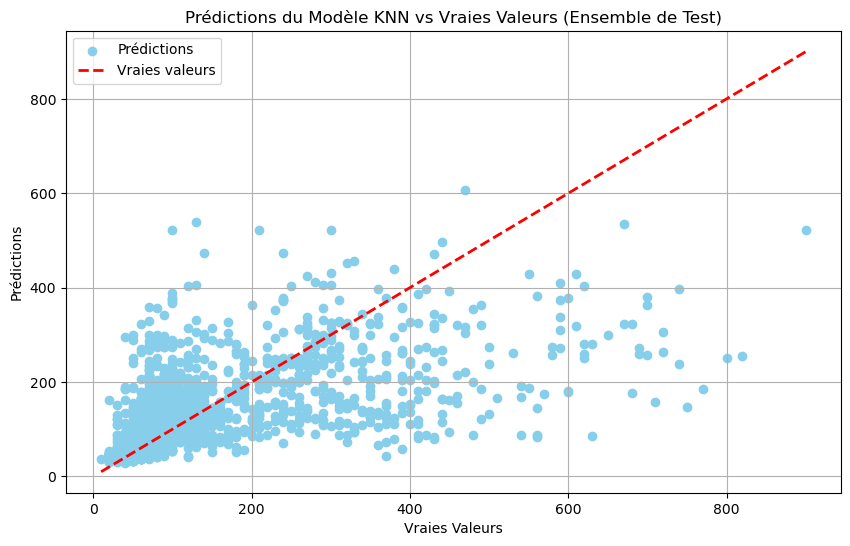

In [66]:
# Tracé des prédictions par rapport aux vraies valeurs pour l'ensemble de test
plt.figure(figsize = (10, 6))
plt.scatter(y_test, y_pred_test_knn, color = 'skyblue', label = 'Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', linestyle = '--', lw = 2, label = 'Vraies valeurs')
plt.title('Prédictions du Modèle KNN vs Vraies Valeurs (Ensemble de Test)')
plt.xlabel('Vraies Valeurs')
plt.ylabel('Prédictions')
plt.legend()
plt.grid(True)
plt.show()

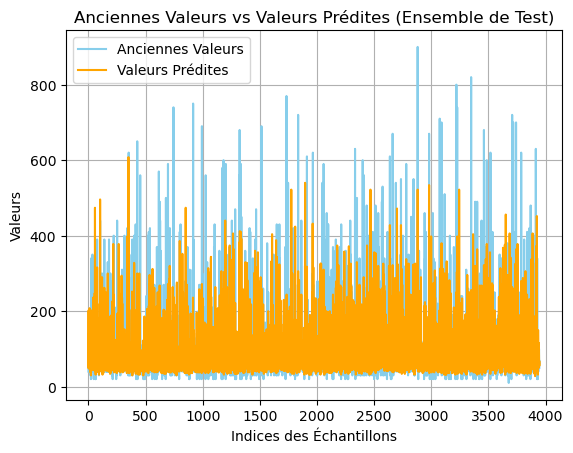

In [68]:
# Tracé des anciennes valeurs en bleu ciel
plt.plot(range(len(y_test)), y_test, color = 'skyblue', label = 'Anciennes Valeurs')

# Tracé des valeurs prédites en orange
plt.plot(range(len(y_test)), y_pred_test_knn, color = 'orange', label = 'Valeurs Prédites')

plt.title('Anciennes Valeurs vs Valeurs Prédites (Ensemble de Test)')
plt.xlabel('Indices des Échantillons')
plt.ylabel('Valeurs')
plt.legend()

plt.grid(True)
plt.show()

# Conclusion

Dans la comparaison des différents modèles de régression pour prédire la consommation d'énergie dans les bâtiments intelligents, plusieurs algorithmes ont été évalués. Malgré nos efforts pour améliorer les performances, le coefficient de détermination (𝑅^2) n'a pas dépassé 0.5 dans la plupart des cas.

Le modèle KNN a montré des résultats prometteurs avec un 
(𝑅^2)
  de 0.455 sur l'ensemble de test, ce qui signifie qu'il explique 45.5% de la variance des données de test. Cependant, ce score peut encore être amélioré en explorant d'autres techniques ou en ajustant les paramètres du modèle.

Le modèle XGBRegressor a produit un 
(𝑅^2)
  de 0.307 sur l'ensemble de test, tandis que le RandomForestRegressor a obtenu un 
(𝑅^2)
  légèrement meilleur de 0.494. Bien que ces modèles montrent une certaine capacité à prédire la consommation d'énergie, il reste encore un potentiel d'amélioration.

Les résultats de la régression linéaire et de la régression Lasso ont été moins satisfaisants, avec des 
(𝑅^2)
  autour de 0.17. Cela suggère que ces modèles linéaires ne capturent pas efficacement la relation entre les caractéristiques et la variable cible.

Enfin, le modèle GradientBoostingRegressor a montré des performances similaires à XGBRegressor, avec un 
(𝑅^2)
  de 0.308 sur l'ensemble de test.

En conclusion, bien que certains modèles aient montré des performances acceptables, il reste encore des défis à relever pour améliorer la précision des prédictions. Cela pourrait impliquer l'exploration de différentes techniques de prétraitement des données, la sélection de caractéristiques plus efficaces, ou l'optimisation des hyperparamètres des modèles.